# Résults

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd

In [2]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'font.size': 10})

In [3]:
ds_nosort=pd.read_csv('Resultats_tests_PANGEO_HPC-HAL-mono.csv')  
ds=ds_nosort.sort_values(by=['Cores'])

In [4]:
ds

,Queue,Nb Noeuds,Workers,Cores,Memory in GB,Resultat1 in sec,Resultat2 in sec,Resultat3 in sec
0,qdev,1,16,16,64.42,483,480,478
3,qt72h,1,24,24,128.85,459,432,423
1,qdev,2,32,32,120.00,262,265,257
2,qt72h,1,40,40,197.57,331,345,340


In [10]:
qdev=ds[ds['Queue']=='qdev']
cores_qdev=qdev['Cores']
workers_qdev=qdev['Workers']
memory_qdev=qdev['Memory in GB']
results_qdev=qdev[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_qdev=results_qdev.mean(axis=1)

In [11]:
min_worker_qdev=workers_qdev.min()
argmin_worker_qdev=workers_qdev.idxmin()
result_min_qdev=mean_results_qdev[argmin_worker_qdev]
scale_qdev=result_min_qdev/(workers_qdev/min_worker_qdev)

In [14]:
qt72h=ds[ds['Queue']=='qt72h']
cores_qt72h=qt72h['Cores']
workers_qt72h=qt72h['Workers']
memory_qt72h=qt72h['Memory in GB']
results_qt72h=qt72h[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_qt72h=results_qt72h.mean(axis=1)

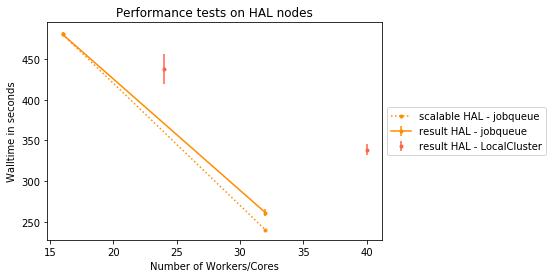

In [16]:
fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(workers_qdev, results_qdev.mean(axis=1), yerr=results_qdev.std(axis=1),
             ls='-',marker='o',ms=3,color='darkorange', 
             label='result HAL - jobqueue')
plt.plot(workers_qdev, scale_qdev, 
             ls=':',marker='o',ms=3,color='darkorange', 
             label='scalable HAL - jobqueue')
plt.errorbar(workers_qt72h, results_qt72h.mean(axis=1), yerr=results_qt72h.std(axis=1),
             ls='',marker='o',ms=3,color='tomato', 
             label='result HAL - LocalCluster')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Workers/Cores')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on HAL nodes')
plt.savefig('Perf-hal-workers.png', bbox_inches='tight')

In [17]:
min_memory_qdev=memory_qdev.min()
argmin_memory_qdev=memory_qdev.idxmin()
result_min_memory_qdev=mean_results_qdev[argmin_memory_qdev]
scale_memory_qdev=result_min_memory_qdev/(memory_qdev/min_memory_qdev)

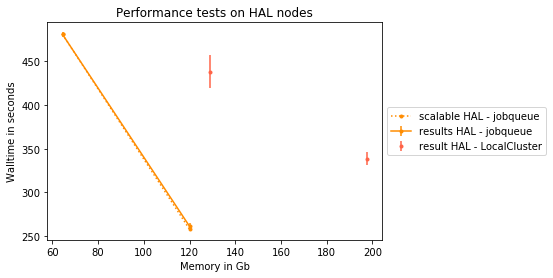

In [18]:
fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(memory_qdev, results_qdev.mean(axis=1), yerr=results_qdev.std(axis=1),
             ls='-',marker='o',ms=3,color='darkorange', 
             label='results HAL - jobqueue')
plt.plot(memory_qdev, scale_memory_qdev, 
             ls=':',marker='o',ms=3,color='darkorange', 
             label='scalable HAL - jobqueue')
plt.errorbar(memory_qt72h, results_qt72h.mean(axis=1), yerr=results_qt72h.std(axis=1),
             ls='',marker='o',ms=3,color='tomato', 
             label='result HAL - LocalCluster')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Memory in Gb')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on HAL nodes')
plt.savefig('Perf-hal-memory.png', bbox_inches='tight')

In [40]:
ds_multi_nosort=pd.read_csv('Resultats_tests_PANGEO_HPC-HAL-multi.csv') 
ds_multi=ds_multi_nosort.sort_values(by=['Cores'])

In [41]:
ds_multi

,Queue,Nb Noeuds,Workers,Cores,Memory in GB,Resultat1 in sec,Resultat2 in sec,Resultat3 in sec
0,qdev,1,4,16,64.42,516,478,474.0
7,qt72h,1,6,24,128.85,719,700,710.0
6,qt1h-40,1,8,40,197.57,1486,1541,1540.0
4,qt1h-28,2,14,56,368.06,203,221,192.0
5,qt1h-40,2,16,80,195.00,211,192,NaN
3,qt1h-28,4,28,112,736.12,135,136,133.0
2,qt1h-40,5,40,200,920.00,122,121,129.0
1,qt1h-40,6,48,240,1100.00,112,108,108.0


In [42]:
qt1h_40=ds_multi[ds_multi['Queue']=='qt1h-40']
workers_qt1h_40=qt1h_40['Workers']
cores_qt1h_40=qt1h_40['Cores']
memory_qt1h_40=qt1h_40['Memory in GB']
results_qt1h_40=qt1h_40[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_qt1h_40=results_qt1h_40.mean(axis=1)

In [43]:
qt1h_28=ds_multi[ds_multi['Queue']=='qt1h-28']
workers_qt1h_28=qt1h_28['Workers']
cores_qt1h_28=qt1h_28['Cores']
memory_qt1h_28=qt1h_28['Memory in GB']
results_qt1h_28=qt1h_28[['Resultat1 in sec','Resultat2 in sec','Resultat3 in sec']]
mean_results_qt1h_28=results_qt1h_28.mean(axis=1)

In [44]:
min_cores_qt1h_40=cores_qt1h_40.min()
argmin_cores_qt1h_40=cores_qt1h_40.idxmin()
result_min_qt1h_40=mean_results_qt1h_40[argmin_cores_qt1h_40]
scale_qt1h_40=result_min_qt1h_40/(cores_qt1h_40/min_cores_qt1h_40)

In [45]:
min_cores_qt1h_28=cores_qt1h_28.min()
argmin_cores_qt1h_28=cores_qt1h_28.idxmin()
result_min_qt1h_28=mean_results_qt1h_28[argmin_cores_qt1h_28]
scale_qt1h_28=result_min_qt1h_28/(cores_qt1h_28/min_cores_qt1h_28)

/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


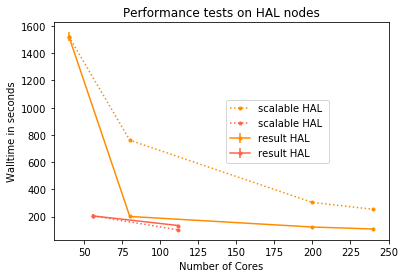

In [46]:
fig, ax = plt.subplots()
fig.figsize=(8, 8)
plt.errorbar(cores_qt1h_40, results_qt1h_40.mean(axis=1), yerr=results_qt1h_40.std(axis=1),
             ls='-',marker='o',ms=3,color='darkorange', 
             label='result HAL ')
plt.plot(cores_qt1h_40, scale_qt1h_40, 
             ls=':',marker='o',ms=3,color='darkorange', 
             label='scalable HAL ')
plt.errorbar(cores_qt1h_28, results_qt1h_28.mean(axis=1), yerr=results_qt1h_28.std(axis=1),
             ls='-',marker='o',ms=3,color='tomato', 
             label='result HAL ')
plt.plot(cores_qt1h_28, scale_qt1h_28, 
             ls=':',marker='o',ms=3,color='tomato', 
             label='scalable HAL ')

plt.legend(loc='center left', bbox_to_anchor=(0.5, 0.5))
plt.xlabel('Number of Cores')
plt.ylabel('Walltime in seconds')
plt.title('Performance tests on HAL nodes')
plt.savefig('Perf-hal-cores-multi.png', bbox_inches='tight')